<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #3**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. 선형회귀모형의 정규화 (Lasso, Ridge 정규화)

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3.2705      52.0  4.772480   1.02

선형회귀모형의 정규화를 위해 Ridge와 Lasso 회귀를  써본다. 두 회귀모형 모두 Alpha 값을 조절하며 학습이 가능하다. 우선 데이터는 Scikit-learn에서 제공하는 예제 데이터인 California housing dataset을 쓰도록 한다. 그 다음 우선 주어진 대로 Alpha값을 1로 주어본 결과 확인한 회귀계수와 bias는 아래와 같다.

In [ ]:
#하이퍼 파라미터인 alpha를 조절하며 다양한 회귀식 도출이 가능하다.
ALPHA=1

rid=Ridge(alpha=ALPHA)
Model=rid.fit(X,Y)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
intercept
-36.93858523232896


In [ ]:
#하이퍼 파라미터인 alpha를 조절하며 다양한 회귀식 도출이 가능하다.
ALPHA=1

las=Lasso(alpha=ALPHA)
Model=las.fit(X,Y)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
1.3480413673416143


여기에 alpha 값을 각각 0.5, 1 그리고 3으로 변경해서 돌려본 결과 회귀모델의 회귀계수와 bias가 변하는 것을 확인할 수 있다.

### 2. 변수 선택


이번에도 1번과 똑같은 데이터로 실험을 진행한다. 다만 통계랑 계산을 위해 통계랑 계산 패키지를 가상환경에 먼저 설치해준다.

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving TEMP.JPG to TEMP.JPG
User uploaded file "TEMP.JPG" with length 19269 bytes


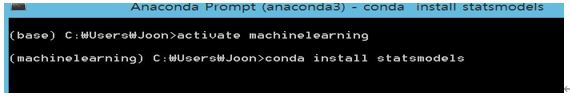

In [3]:
from IPython.display import Image
Image('TEMP.JPG')

위 데이터는 입력변수가 많기 때문에 변수를 선택하는 것은 회귀분석에서 중요한 일이다. 여기서 의미 있는 변수를 선택하는 가장 대표적인 3가지 방법은 Forward selection, Backward elimination, Stepwise selection이 있다. Cutoff 매개변수를 0.01로 주면 모두 다 population 변수를 제외하는 것을 확인할 수 있다. 아래는 각각 forward selection, backward elimination, stepwise selection을 cutoff=0.01로 줬을 때의 결과이다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3.2705      52.0  4.772480   1.02

In [ ]:
'''
코드 실행 전에 아나콘다 프롬프트에서 'machinelearning' 가상환경을 활성화시킨 후 'conda install statsmodels'로 
통계량 계산 라이브러리(패키지)를 설치해야한다.

''' 
import statsmodels.api as sm

#forward selection 함수 정의: 입력변수를 하나씩 추가하면서 최소 p-value가 기준값인 cutoff-value보다 큰 변수가 나올 때까지 반복한다.
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def forward_selection(data,target,cutoff=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
forwarddata=forward_selection(DF,Y,0.01)
print(forwarddata)

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


In [ ]:
#backward elimination 함수 정의: full model에서 입력변수를 하나씩 제거하면서 남아 있는 모든 입력변수 중 쵀대 p-value가 cutoff-value보다 낮아질 때까지 반복한다. 
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def backward_elimination(data, target, cutoff= 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= cutoff):
            excluded_feature=p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backwarddata=backward_elimination(DF,Y,0.01)
print(backwarddata)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
#stepwise selection 함수 정의: 위의 두 함수의 원리를 결합한 형태로 반복한다.
#함수의 인자로 있는 cutoff 매개변수 값을 조절하면서 학습하면 된다.
def stepwise_selection(data,target,cutoff):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= cutoff):
                    excluded_feature=p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

stepdata=stepwise_selection(DF,Y,0.01)
print(stepdata)

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


No handles with labels found to put in legend.


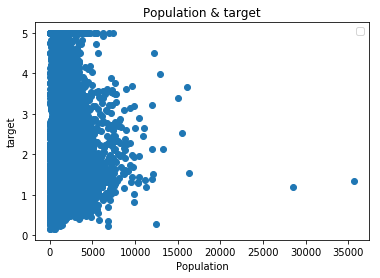

In [ ]:
#i번째 feature와 타겟 값 사이의 관계 시각화
i=4
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]],Y)
plt.legend()
plt.show()